In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#data1 = pd.read_csv('../data/data1.csv', skiprows=np.arange(6))
#data2 = pd.read_csv('../data/data2.csv', skiprows=np.arange(6))
#data3 = pd.read_csv('../data/data3.csv', skiprows=np.arange(6))

#data = pd.concat([data1,data2,data3])
#data.to_csv('../data/concat_data.csv')

In [12]:
data = pd.read_csv('../data/concat_data.csv')
data['diff'] = data['newts-buffer'] - data['newts-corridor'] 
data

,Unnamed: 0,[run number],capacity,mean-juvenile-mortality-prob,number-of-startind,movement-in-forest,max-timesteps,current-scenario,cropland-movement-cost,angle-for-viewing-ponds-and-woodland,...,mean-number-of-female-offspring,mean-adult-mortality-prob,[step],newts-buffer,newts-corridor,newts-corridor-pond1,newts-buffer-pond1,occupied-ponds-corridor,occupied-ponds-buffer,diff
0,0,5,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,40,8,0,11,2,4,32
1,1,2,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,14,32,0,0,4,2,-18
2,2,9,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,14,40,5,10,5,3,-26
3,3,11,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,50,54,12,5,5,6,-4
4,4,10,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,56,51,6,3,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,1395,1393,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,78,52,11,11,6,7,26
2096,1396,1396,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,76,49,12,11,6,7,27
2097,1397,1397,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,57,61,8,6,7,7,-4
2098,1398,1399,20,0.5,15,mean forest patches,50,corridors,5,140,...,5,0.2,99,70,45,0,14,4,7,25


In [13]:
std_data = data.groupby(['mortality-decrease-with-buffer', 'distance-for-viewing-ponds-and-woodland']).std()

std_values_buffer = std_data['newts-buffer'].values
std_values_corridors = std_data['newts-corridor'].values
std_values_diff = std_data['diff'].values

heat_data_diff_std = pd.DataFrame(np.reshape(std_values_diff, (5, 7)), 
                         index = np.unique(data['mortality-decrease-with-buffer']), 
                         columns = np.unique(data['distance-for-viewing-ponds-and-woodland']) )



means_data = data.groupby(['mortality-decrease-with-buffer', 'distance-for-viewing-ponds-and-woodland']).mean()

mean_values_buffer = means_data['newts-buffer'].values
mean_values_corridors = means_data['newts-corridor'].values
mean_values_diff = means_data['diff'].values

heat_data_buffer = pd.DataFrame(np.reshape(mean_values_buffer, (5, 7)), 
                         index = np.unique(data['mortality-decrease-with-buffer']), 
                         columns = np.unique(data['distance-for-viewing-ponds-and-woodland']) )

heat_data_corridors = pd.DataFrame(np.reshape(mean_values_corridors, (5, 7)), 
                         index = np.unique(data['mortality-decrease-with-buffer']), 
                         columns = np.unique(data['distance-for-viewing-ponds-and-woodland']) )

heat_data_diff = pd.DataFrame(np.reshape(mean_values_diff, (5, 7)), 
                         index = np.unique(data['mortality-decrease-with-buffer']), 
                         columns = np.unique(data['distance-for-viewing-ponds-and-woodland']) )

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(heat_data_buffer, annot=False, square = False)
plt.ylabel('Mortality decrease with buffers', size=15)
plt.xlabel('How far can newts see ponds and woodland?', size=15)
plt.title('Buffers', size=20)
plt.show();

plt.figure(figsize= (15,8))
sns.heatmap(heat_data_corridors, annot=False, square = False)
plt.ylabel('Mortality decrease with buffers', size=15)
plt.xlabel('How far can newts see ponds and woodland?', size=15)
plt.title('Corridors', size=20)
plt.show();

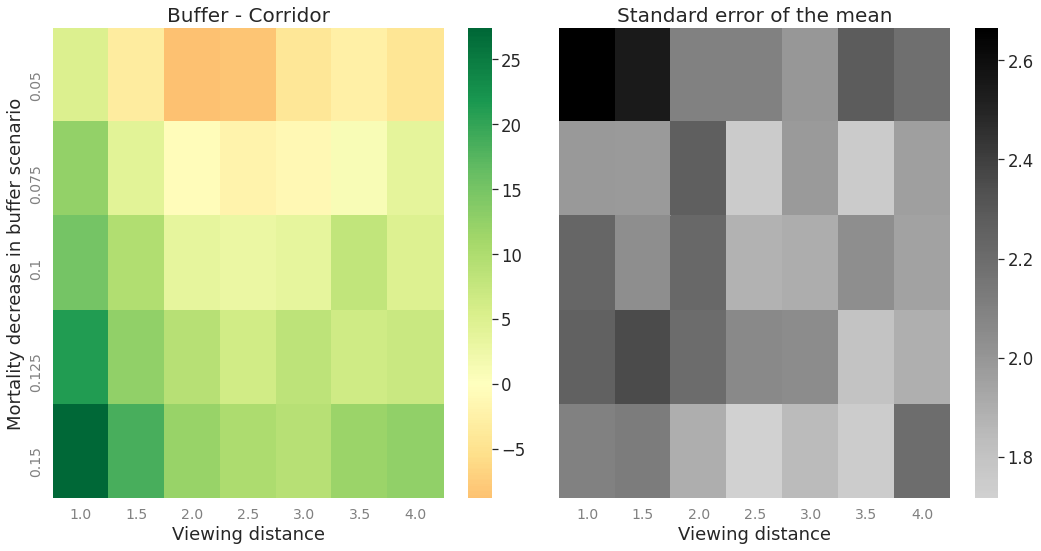

In [67]:


fig, ax =plt.subplots(1,2, figsize=(15,8), sharey=True)
sns.set(font_scale=1.5)

sns.heatmap(heat_data_diff, 
            annot=False, square = False, 
            center = 0, 
            cmap="RdYlGn", 
            ax=ax[0])
ax[0].tick_params(axis='both', which='major', labelsize=14, labelcolor='grey')
ax[0].set_ylabel('Mortality decrease in buffer scenario', size=18)
ax[0].set_xlabel('Viewing distance', size=18)
ax[0].set_title('Buffer - Corridor', size=20)


sns.heatmap(heat_data_diff_std / np.sqrt(60), 
            annot=False, square = False, 
            center = 2, 
            cmap=plt.get_cmap('Greys'),
            ax=ax[1])

ax[1].tick_params(axis='both', which='major', labelsize=14, labelcolor='grey')
ax[1].set_xlabel('Viewing distance', size=18)
ax[1].set_title('Standard error of the mean', size=20);
  
plt.tight_layout()

          
plt.savefig('../results/mortality_viewing_distance_heatmap.png', dpi=400)
#plt.show();
